In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [63]:
imdb= pd.read_csv('imdbrough.csv')
roi= pd.read_csv('roiimdb.csv')

In [64]:
roi.set_index('imdbcode', inplace=True)

In [65]:
imdb.set_index('Unnamed: 0', inplace=True)

In [66]:
imdb.columns = ['movie','release_year', 'MPAA_rating', 'runtime', 'genre', 'release_date',  'country', 'audience_score', 'UnknownX', 'UnknownY']

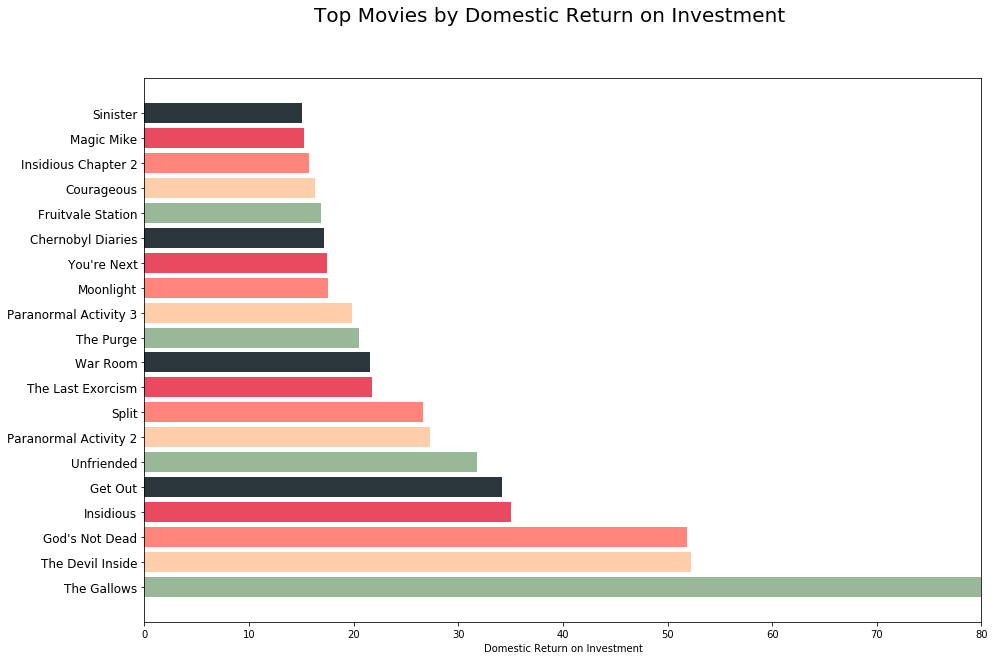

In [67]:
#Graph of Top Return on Investments from Sample
fig, ax = plt.subplots(figsize=(15,10))
movies= ['The Gallows','The Devil Inside',"God's Not Dead",'Insidious', 'Get Out','Unfriended', 'Paranormal Activity 2','Split', 'The Last Exorcism', 'War Room', 'The Purge', 'Paranormal Activity 3', 'Moonlight', "You're Next", 'Chernobyl Diaries', 'Fruitvale Station', 'Courageous', 'Insidious Chapter 2', 'Magic Mike', 'Sinister']
ax.barh(movies, roi.sort_values(by='dom_roi',ascending=False).dom_roi[:20], color=['#99B898','#FECEAB', '#FF847C', '#E84A5F', '#2A363B'])
ax.set_xlim(0,80)
ax.set_yticklabels(labels=movies, fontsize=12)
ax.set_xlabel('Domestic Return on Investment')
fig.suptitle('Top Movies by Domestic Return on Investment', fontsize=20)
plt.savefig('genre_topmovies.png')

In [10]:
#codeblock to recreate lists
imdb.genre = [str(item) for item in imdb.genre]
imdb['genrelist'] = imdb.genre.apply(lambda x : x.split(','))


In [11]:
imdb.genrelist = [[item.replace("'","").lstrip("\n").replace("[","").replace("]","").lstrip("\n").strip()for item in groups] for groups in imdb.genrelist]

In [13]:
#codeblock to create genre dictionary

allgenres = [item for items in imdb.genrelist for item in items]
uniqueterms = list(set(allgenres))
termscounts = zip(uniqueterms, [allgenres.count(genre) for genre in uniqueterms])
orderedcounts = sorted(termscounts,key = lambda x: x[1], reverse = True)
genredict={}
for term, count in orderedcounts:
    imdbkeys=list(imdb[imdb.genre.map(lambda x: term in x)==True].index)
    genredict[term] = [count, imdbkeys, [roi.loc[key, 'movie'] for key in imdbkeys]]
len(genredict)

46

In [14]:
genredf = pd.DataFrame.from_dict(genredict, orient='index')

In [15]:
genredf.columns=['movie_count', 'imdb_keys', 'movie_titles']
genredf.head()

,movie_count,imdb_keys,movie_titles
Drama,879,"[tt0955308, tt1343092, tt1856101, tt0918940, t...","[[Robin Hood, Robin Hood], The Great Gatsby, B..."
Comedy,591,"[tt1210819, tt0398286, tt1409024, tt2277860, t...","[The Lone Ranger, Tangled, Men in Black 3, Fin..."
Action,489,"[tt1298650, tt6565702, tt2395427, tt2527336, t...","[Pirates of the Caribbean: On Stranger Tides, ..."
Adventure,380,"[tt1298650, tt6565702, tt2395427, tt2527336, t...","[Pirates of the Caribbean: On Stranger Tides, ..."
Thriller,274,"[tt2379713, tt1074638, tt2820852, tt4912910, t...","[Spectre, Skyfall, Furious 7, Mission: Impossi..."


In [17]:
#domroi_averages
domroi_averages=[]
domrois = []
for genre in genredf.index:
    junk = [roi.loc[key, 'dom_roi'] for key in genredf.loc[genre, 'imdb_keys']]
    clean = [x for x in junk if isinstance(x,float)]
    average = sum(clean)/len(clean)
    domroi_averages.append(average)
    domrois.append(clean)
genredf['average_domroi']=[average for average in domroi_averages]
genredf['domrois']=domrois
genredf.dtypes

movie_count         int64
imdb_keys          object
movie_titles       object
average_domroi    float64
domrois            object
dtype: object

In [19]:
#genredf['average_worldroi']
worldroi_averages=[]
worldrois=[]
for genre in genredf.index:
    junk = [roi.loc[key, 'world_roi'] for key in genredf.loc[genre,'imdb_keys']]
    clean = [x for x in junk if isinstance(x,float)]
    average = sum(clean)/len(clean)
    worldroi_averages.append(average)
    worldrois.append(clean)
genredf['average_worldroi']=[average for average in worldroi_averages]
genredf['worldrois'] = worldrois
genredf.dtypes

movie_count           int64
imdb_keys            object
movie_titles         object
average_domroi      float64
domrois              object
average_worldroi    float64
worldrois            object
dtype: object

In [20]:
#percent that broke even
percentages=[]
for genre in genredf.index:
    junk = [roi.loc[key, 'world_roi'] for key in genredf.loc[genre,'imdb_keys']]
    clean = [x>0 for x in junk if isinstance(x, float)]
    if len(clean)>5:
        percentage = sum(clean)/len(clean)
    else:
        percentage = None
    percentages.append(percentage)
genredf['percent']= percentages
genredf.dtypes

movie_count           int64
imdb_keys            object
movie_titles         object
average_domroi      float64
domrois              object
average_worldroi    float64
worldrois            object
percent             float64
dtype: object

In [22]:
#budgetdata
average_budgets=[]
budgets=[]
for genre in genredf.index:
    junk = [roi.loc[key, 'production_budget'] for key in genredf.loc[genre,'imdb_keys']]
    clean = [x for x in junk if isinstance(x,float)]
    average = sum(clean)/len(clean)
    average_budgets.append(average)
    budgets.append(clean)
genredf['average_budget']=average_budgets
genredf['budgets'] = budgets
genredf.dtypes

movie_count           int64
imdb_keys            object
movie_titles         object
average_domroi      float64
domrois              object
average_worldroi    float64
worldrois            object
percent             float64
average_budget      float64
budgets              object
dtype: object

In [23]:
genredf.drop(labels=list(genredf[genredf.movie_count<=2].index), inplace=True)

In [24]:
genredf.sort_values(by='percent', ascending=False)

,movie_count,imdb_keys,movie_titles,average_domroi,domrois,average_worldroi,worldrois,percent,average_budget,budgets
Animation,114,"[tt0398286, tt3606756, tt2277860, tt0435761, t...","[Tangled, Incredibles 2, Finding Dory, Toy Sto...",0.409272,"[-0.2276079384615385, 2.04290872, 1.431477805,...",2.713328,"[1.2556816923076923, 5.212603555, 4.106075965,...",0.877193,9.215658e+07,"[260000000.0, 200000000.0, 200000000.0, 200000..."
Adventure,380,"[tt1298650, tt6565702, tt2395427, tt2527336, t...","[Pirates of the Caribbean: On Stranger Tides, ...",0.222869,"[-0.4128985021919143, -0.8778218571428571, 0.3...",2.281185,"[1.5466728567949342, -0.5721075714285714, 3.24...",0.849604,1.077107e+08,"[410600000.0, 350000000.0, 330600000.0, 317000..."
Family,96,"[tt1014759, tt1623205, tt4123430, tt6139732, t...","[Alice in Wonderland, Oz the Great and Powerfu...",0.519796,"[0.67095555, 0.17385498, -0.202220495, 0.35568...",1.982244,"[4.12745555, 1.451795255, 2.26110043, 2.402386...",0.810526,6.696211e+07,"[200000000.0, 200000000.0, 200000000.0, 182000..."
Sci-Fi,155,"[tt6565702, tt2395427, tt2488496, tt4154756, t...","[Dark Phoenix, Avengers: Age of Ultron, Star W...",2.018759,"[-0.8778218571428571, 0.3884025045372051, 2.06...",5.201683,"[-0.5721075714285714, 3.2438413883847548, 5.71...",0.800000,9.275377e+07,"[350000000.0, 330600000.0, 306000000.0, 300000..."
Thriller,274,"[tt2379713, tt1074638, tt2820852, tt4912910, t...","[Spectre, Skyfall, Furious 7, Mission: Impossi...",1.687352,"[-0.3330860833333333, 0.521801385, 0.857931684...",4.688268,"[1.9320697433333327, 4.552634905, 6.9932778631...",0.781022,3.175183e+07,"[300000000.0, 200000000.0, 190000000.0, 178000..."
Action,489,"[tt1298650, tt6565702, tt2395427, tt2527336, t...","[Pirates of the Caribbean: On Stranger Tides, ...",0.187842,"[-0.4128985021919143, -0.8778218571428571, 0.3...",1.885848,"[1.5466728567949342, -0.5721075714285714, 3.24...",0.774590,8.170338e+07,"[410600000.0, 350000000.0, 330600000.0, 317000..."
Mystery,155,"[tt1856101, tt9382818, tt1951264, tt0944835, t...","[Blade Runner 2049, The Twilight Saga: Breakin...",4.125097,"[-0.5024099513513514, 1.1462902863436124, 2.26...",8.982752,"[0.4019319351351352, 5.0919584214390605, 5.652...",0.774194,2.356757e+07,"[185000000.0, 136200000.0, 130000000.0, 130000..."
Horror,183,"[tt0816711, tt4779682, tt1077368, tt0780653, t...","[World War Z, The Meg, Dark Shadows, The Wolfm...",4.823449,"[0.06505111052631579, -0.18290032584269664, -0...",9.953595,"[1.7974455263157896, 1.9748916573033708, 0.588...",0.769231,1.889143e+07,"[190000000.0, 178000000.0, 150000000.0, 150000..."
Fantasy,138,"[tt1298650, tt2527336, tt0974015, tt0903624, t...","[Pirates of the Caribbean: On Stranger Tides, ...",0.408196,"[-0.4128985021919143, 0.95640814511041, -0.236...",1.938686,"[1.5466728567949342, 3.1536963627760253, 1.186...",0.768116,8.307283e+07,"[410600000.0, 317000000.0, 300000000.0, 250000..."
Comedy,591,"[tt1210819, tt0398286, tt1409024, tt2277860, t...","[The Lone Ranger, Tangled, Men in Black 3, Fin...",0.716369,"[-0.6752650363636363, -0.2276079384615385, -0....",2.185421,"[-0.05453776363636364, 1.2556816923076923, 2.0...",0.761499,3.847847e+07,"[275000000.0, 260000000.0, 215000000.0, 200000..."


In [25]:
genredf.sort_values(by='average_worldroi', ascending=False)

,movie_count,imdb_keys,movie_titles,average_domroi,domrois,average_worldroi,worldrois,percent,average_budget,budgets
Horror,183,"[tt0816711, tt4779682, tt1077368, tt0780653, t...","[World War Z, The Meg, Dark Shadows, The Wolfm...",4.823449,"[0.06505111052631579, -0.18290032584269664, -0...",9.953595,"[1.7974455263157896, 1.9748916573033708, 0.588...",0.769231,1.889143e+07,"[190000000.0, 178000000.0, 150000000.0, 150000..."
Mystery,155,"[tt1856101, tt9382818, tt1951264, tt0944835, t...","[Blade Runner 2049, The Twilight Saga: Breakin...",4.125097,"[-0.5024099513513514, 1.1462902863436124, 2.26...",8.982752,"[0.4019319351351352, 5.0919584214390605, 5.652...",0.774194,2.356757e+07,"[185000000.0, 136200000.0, 130000000.0, 130000..."
Sci-Fi,155,"[tt6565702, tt2395427, tt2488496, tt4154756, t...","[Dark Phoenix, Avengers: Age of Ultron, Star W...",2.018759,"[-0.8778218571428571, 0.3884025045372051, 2.06...",5.201683,"[-0.5721075714285714, 3.2438413883847548, 5.71...",0.800000,9.275377e+07,"[350000000.0, 330600000.0, 306000000.0, 300000..."
Thriller,274,"[tt2379713, tt1074638, tt2820852, tt4912910, t...","[Spectre, Skyfall, Furious 7, Mission: Impossi...",1.687352,"[-0.3330860833333333, 0.521801385, 0.857931684...",4.688268,"[1.9320697433333327, 4.552634905, 6.9932778631...",0.781022,3.175183e+07,"[300000000.0, 200000000.0, 190000000.0, 178000..."
Animation,114,"[tt0398286, tt3606756, tt2277860, tt0435761, t...","[Tangled, Incredibles 2, Finding Dory, Toy Sto...",0.409272,"[-0.2276079384615385, 2.04290872, 1.431477805,...",2.713328,"[1.2556816923076923, 5.212603555, 4.106075965,...",0.877193,9.215658e+07,"[260000000.0, 200000000.0, 200000000.0, 200000..."
Romance,240,"[tt1343092, tt1341188, tt1355644, tt3640424, t...","[The Great Gatsby, How Do You Know?, Passenger...",0.903934,"[-0.2376820052631579, -0.7482281666666667, -0....",2.484262,"[0.8475811526315791, -0.5864318583333333, 1.74...",0.708333,2.109997e+07,"[190000000.0, 120000000.0, 110000000.0, 106000..."
Biography,159,"[tt0993846, tt1390411, tt1485796, tt1186830, t...","[The Wolf of Wall Street, In the Heart of the ...",0.724859,"[0.16900694, -0.74979242, 1.0754782619047618, ...",2.387416,"[2.89870414, -0.10306691, 3.603161309523808, -...",0.643312,2.392070e+07,"[100000000.0, 100000000.0, 84000000.0, 7000000..."
Drama,879,"[tt0955308, tt1343092, tt1856101, tt0918940, t...","[[Robin Hood, Robin Hood], The Great Gatsby, B...",0.724307,"[-0.2376820052631579, -0.5024099513513514, -0....",2.300104,"[0.8475811526315791, 0.4019319351351352, 0.938...",0.643021,2.518795e+07,"[190000000.0, 185000000.0, 180000000.0, 180000..."
Music,62,"[tt2771200, tt1485796, tt1336608, tt1707386, t...","[Beauty and the Beast, The Greatest Showman, R...",0.585863,"[2.15008853125, 1.0754782619047618, -0.4497340...",2.299353,"[6.8699981625, 3.603161309523808, -0.128115257...",0.662162,1.877284e+07,"[160000000.0, 84000000.0, 70000000.0, 65000000..."
Adventure,380,"[tt1298650, tt6565702, tt2395427, tt2527336, t...","[Pirates of the Caribbean: On Stranger Tides, ...",0.222869,"[-0.4128985021919143, -0.8778218571428571, 0.3...",2.281185,"[1.5466728567949342, -0.5721075714285714, 3.24...",0.849604,1.077107e+08,"[410600000.0, 350000000.0, 330600000.0, 317000..."


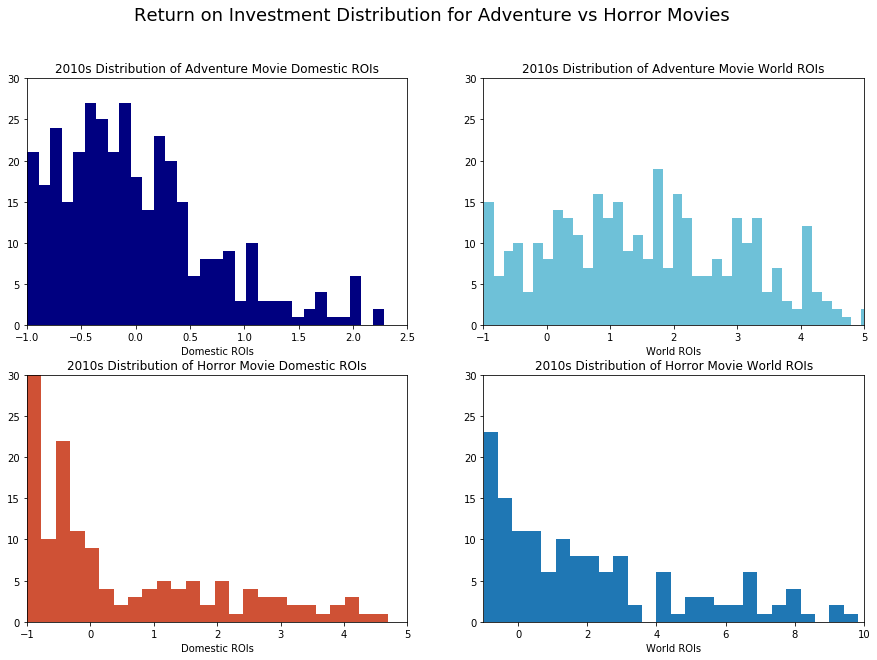

In [68]:
#Study of Distribution of Return on Investment Based on Drama
fig, axs = plt.subplots(2, 2, figsize = (15, 10))
bins=list(np.logspace(0,np.log10(100), 100))
fig.suptitle('Return on Investment Distribution for Adventure vs Horror Movies', fontsize=18)
axs[0][0].hist(genredf.loc['Adventure', 'domrois'], bins=75, color='navy')
axs[0][0].set_xlim(-1,2.5)
axs[0][0].set_xlabel('Domestic ROIs')
axs[0][0].set_ylim(0,30)
axs[0][0].set_title('2010s Distribution of Adventure Movie Domestic ROIs')
axs[0][1].hist(genredf.loc['Adventure', 'worldrois'], bins=100, color='#6ec1d8')
axs[0][1].set_xlim(-1,5)
axs[0][1].set_xlabel('World ROIs')
axs[0][1].set_ylim(0,30)
axs[0][1].set_title('2010s Distribution of Adventure Movie World ROIs')
axs[1][0].hist(genredf.loc['Horror', 'domrois'], bins=1000, color= '#cf5135')
axs[1][0].set_xlim(-1, 5)
axs[1][0].set_xlabel('Domestic ROIs')
axs[1][0].set_ylim(0,30)
axs[1][0].set_title('2010s Distribution of Horror Movie Domestic ROIs')
axs[1][1].hist(genredf.loc['Horror', 'worldrois'], bins=1000)
axs[1][1].set_xlim(-1,10)
axs[1][1].set_xlabel('World ROIs')
axs[1][1].set_ylim(0,30)
axs[1][1].set_title('2010s Distribution of Horror Movie World ROIs')
plt.savefig('genre_comparison.png')

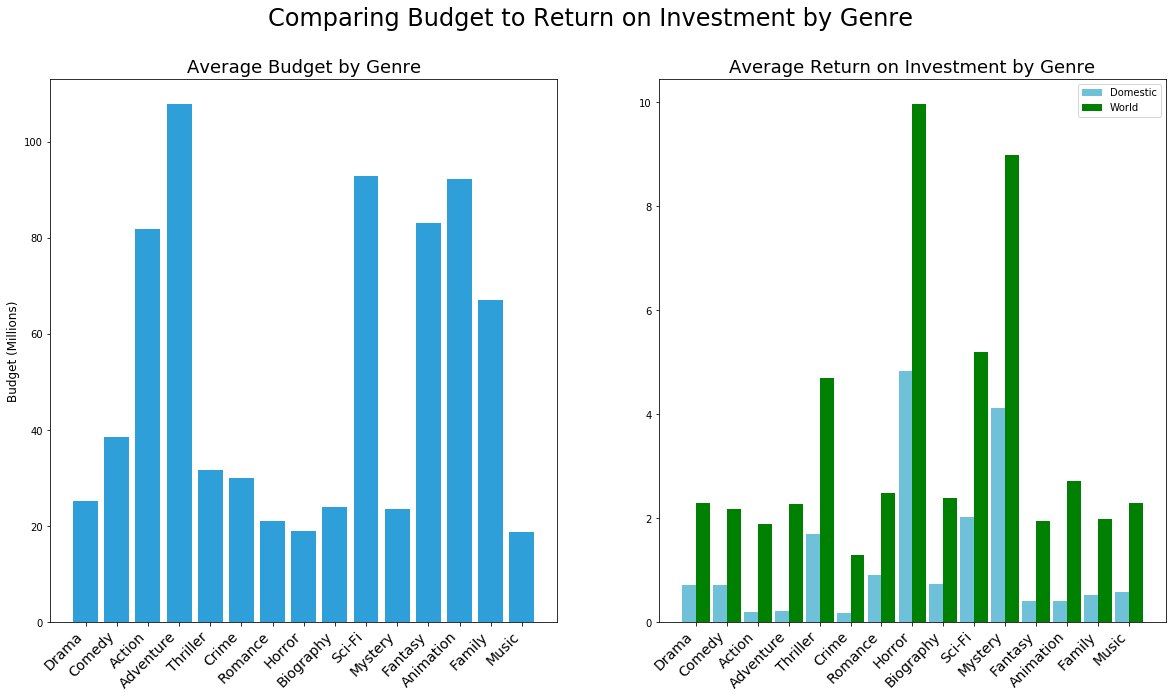

In [69]:
fig,axs = plt.subplots(1,2, figsize=(20,10))
width=0.45
ind = np.arange(15)
fig.suptitle('Comparing Budget to Return on Investment by Genre', fontsize=24)
axs[0].bar(genredf.index[:15], genredf.average_budget[:15], color='#2e9fd8')
axs[0].set_xticklabels(labels =genredf.index[:15], fontsize=14, rotation=45, ha="right")
axs[0].set_yticklabels([0, 20, 40, 60, 80, 100])
axs[0].set_ylabel('Budget (Millions)', fontsize= 12)
axs[0].set_title('Average Budget by Genre', fontsize=18)
axs[1].bar((ind-width/2), genredf.average_domroi[:15], width, label='Domestic', color= '#6ec1d8')
axs[1].bar((ind+width/2), genredf.average_worldroi[:15], width, label='World', color='green')
axs[1].set_xticks(ind)
axs[1].set_title('Average Return on Investment by Genre', fontsize=18)
axs[1].set_xticklabels(labels=genredf.index[:15], fontsize=14, rotation=45, ha="right")
axs[1].legend()
plt.savefig('genre_budgettoreturn.png')

/Users/antonhaugen/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/antonhaugen/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


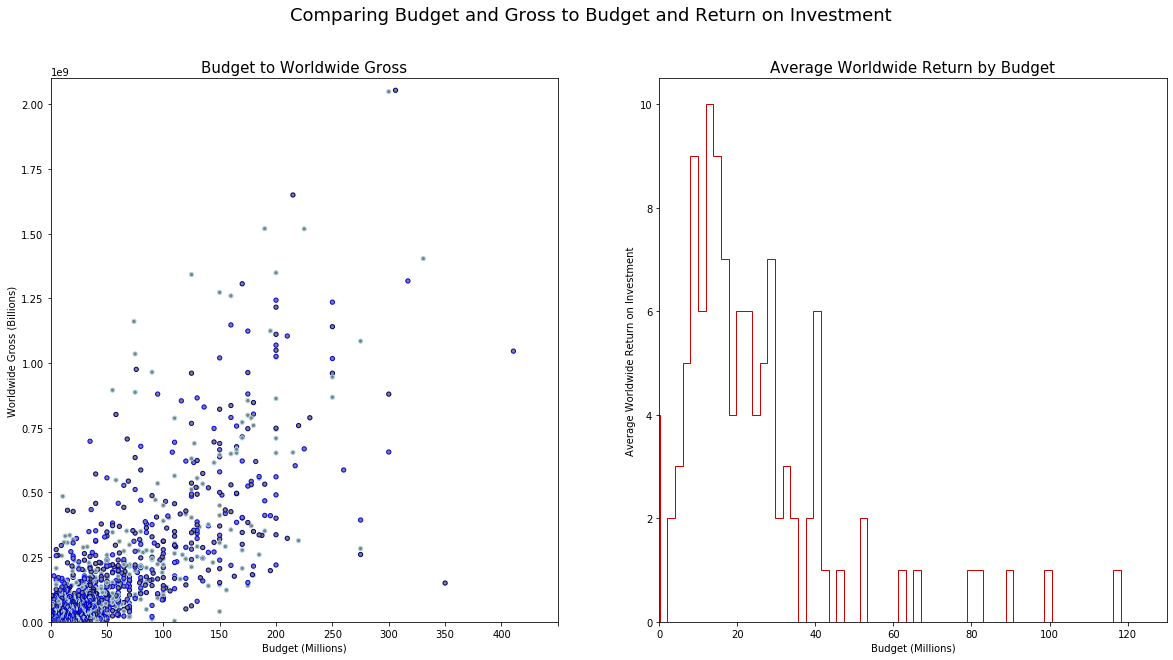

In [70]:
#organizing average world roi around budget data
bins=[x*10**5 for x in range(10,1001,5)]
roi.groupby(pd.cut(roi.production_budget, bins)).world_roi.mean()

#GRAPH
fig, ax = plt.subplots (1,2, figsize=(20,10))
ax[0].scatter(roi.production_budget, roi.worldwide_gross, s=18, c='grey', edgecolors=['blue','navy','lightblue'])
ax[0].set_ylabel('Worldwide Gross (Billions)')
ax[0].set_ylim(-5,2.1*10**9)
ax[0].set_xlabel('Budget (Millions)')
ax[0].set_title('Budget to Worldwide Gross', fontsize=15)
ax[0].set_xticklabels([0, 50, 100, 150, 200, 250, 300, 350, 400])
ax[0].set_xlim(0,4.5*10**8)
ax[1].hist(roi.groupby(pd.cut(roi.production_budget, bins)).world_roi.mean(), bins=65, histtype='step', color='#CF0000')
ax[1].set_xlim(0,13)
ax[1].set_xticklabels([0,20, 40, 60, 80, 100, 120])
ax[1].set_ylabel('Average Worldwide Return on Investment')
ax[1].set_xlabel('Budget (Millions)')
ax[1].set_title('Average Worldwide Return by Budget', fontsize=15)
fig.suptitle('Comparing Budget and Gross to Budget and Return on Investment', fontsize=18)
plt.savefig('genre_whyroi.png')

## 